# [Distributions of observations within categories](https://seaborn.pydata.org/tutorial/categorical.html#distributions-of-observations-within-categories)

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

## Boxplots
The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")

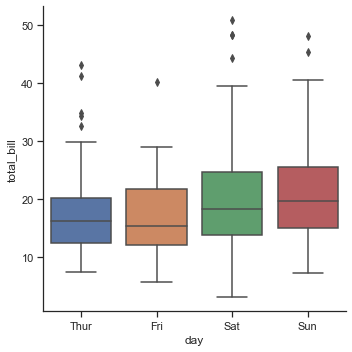

In [2]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:

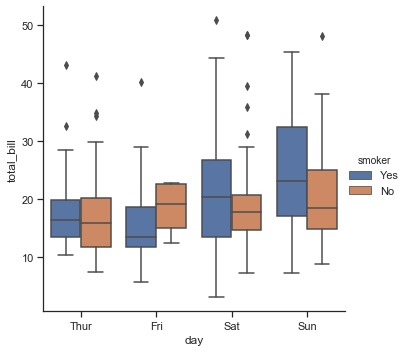

In [3]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging:

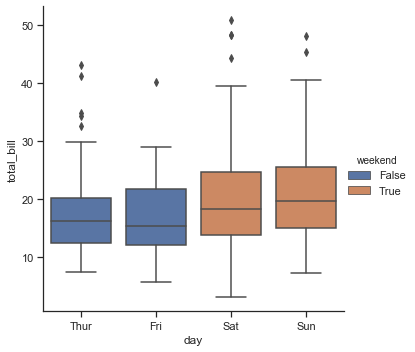

In [4]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

In [6]:
diamonds = sns.load_dataset("diamonds")

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

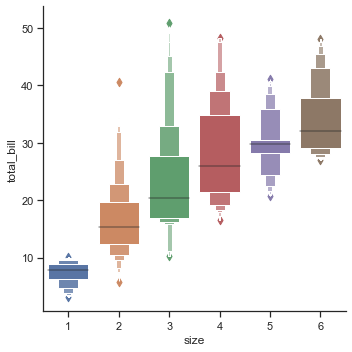

In [7]:
sns.catplot(x="size", y="total_bill", kind="boxen",
            data=tips.sort_values("total_bill"));

## Violinplots

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the [distributions](https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial) tutorial:

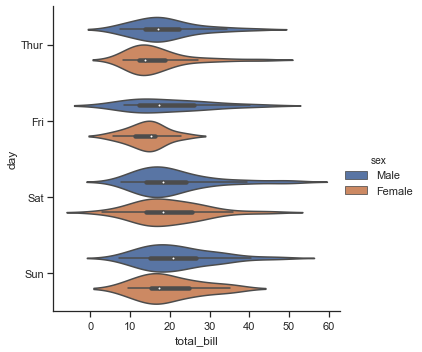

In [8]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

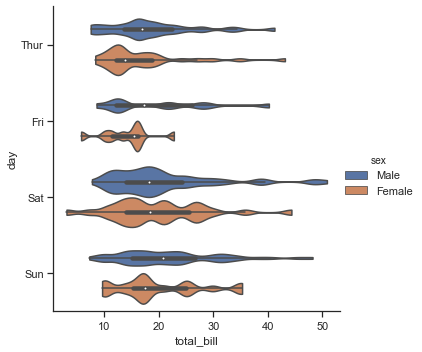

In [9]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

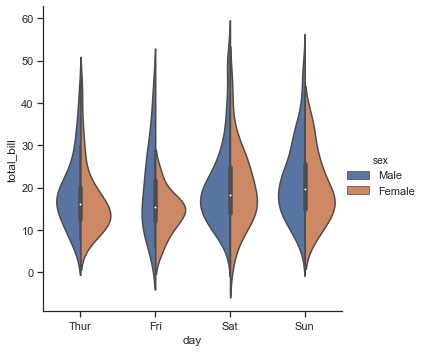

In [10]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

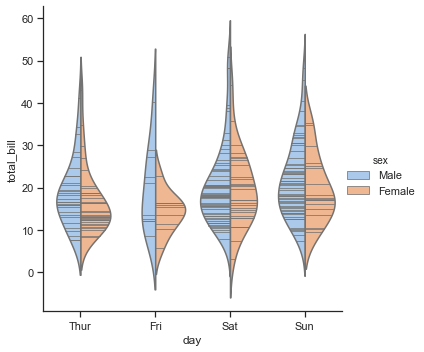

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

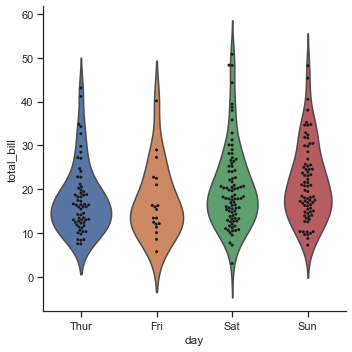

In [12]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);